In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'datasets/df_causas_violentas.csv'
df = pd.read_csv(file)

In [3]:
df.head()

,cod_uf,UF,ano,ordem,cod_causa,quantidade,descricao
0,11,Rondônia,2008,1,X95,259,Agressão por meio de disparo de outra arma de ...
1,11,Rondônia,2008,2,V89,227,Acidente com um veículo a motor ou não-motoriz...
2,11,Rondônia,2008,3,X99,110,Agressão por meio de objeto cortante ou penetr...
3,11,Rondônia,2008,4,W74,60,Afogamento e submersão não especificados
4,11,Rondônia,2008,5,X70,41,Lesão autoprovocada intencionalmente por enfor...


In [4]:
# Quais as principais causas (CID-10) de mortes violentas por estado?

In [5]:
grouped = df[df['UF'] == 'Acre'].groupby(['UF', 'descricao']).quantidade.sum().reset_index()

In [6]:
grouped.shape

(19, 3)

In [7]:
df_new = pd.DataFrame(grouped)

In [8]:
df_new.shape

(19, 3)

In [9]:
df_new

,UF,descricao,quantidade
0,Acre,Acidente com um veículo a motor ou não-motoriz...,757
1,Acre,Afogamento e submersão em águas naturais,95
2,Acre,Afogamento e submersão não especificados,212
3,Acre,Afogamento e submersão relacionados com transp...,5
4,Acre,Agressão por meio de disparo de arma de fogo d...,130
5,Acre,Agressão por meio de disparo de outra arma de ...,1326
6,Acre,Agressão por meio de força corporal,19
7,Acre,Agressão por meio de objeto cortante ou penetr...,880
8,Acre,Agressão por meio de um objeto contundente,153
9,Acre,Exposição a corrente elétrica não especificada,91


In [10]:
df_new.sort_values(by='quantidade', ascending=False, inplace=True)

In [11]:
df_new.set_index('descricao', inplace=True)

In [12]:
df_new.head()

,UF,quantidade
descricao,,
Agressão por meio de disparo de outra arma de fogo ou de arma não especificada,Acre,1326
Agressão por meio de objeto cortante ou penetrante,Acre,880
"Acidente com um veículo a motor ou não-motorizado, tipo(s) de veículo(s) não especificado(s)",Acre,757
"Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação",Acre,375
Afogamento e submersão não especificados,Acre,212


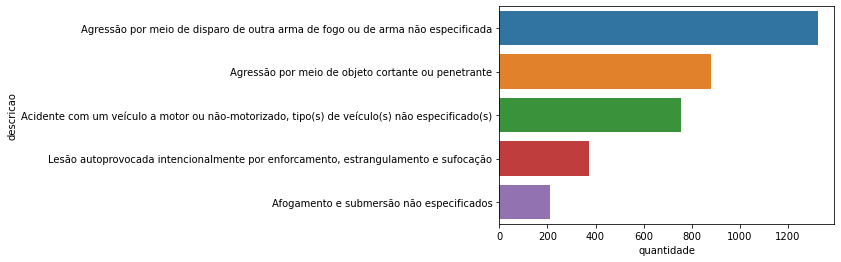

In [13]:
sns.barplot(x=df_new['quantidade'][:5], y=df_new[:5].index)
plt.show()